In [ ]:
import pandas as pd

news = pd.read_csv("/content/drive/MyDrive/뉴스텍스트데이터.csv",encoding='utf-8')
news

- 우리 귀에 들리는 소리는 세기/높낮이/음색 이라는 3가지 요소를 가진다.
- 각각 파동의 진폭/진동수/파형에 해당한다.
- 파동의 진폭이 클수록 큰 소리가 나고 파동의 진동수(주파수)가 높을 수록 고음이 난다.


# 전체 음성 분석

Detected language 'ko' with probability 0.99951171875

- [00:00:01,000 --> 00:00:12,000]  이른바 햄버거병 유발 가능성이 있는 햄버거용 패티를 맥도날드에 납품한 혐의로 영장이 청구된 업체의 임원들이 또 구속위기를 피했습니다.
- [00:00:13,220 --> 00:00:24,220]  서울중앙지방법원은 축산물위생관리법 위반 혐의를 받는 M사 경영이사, 송 모 씨 등 3명에 대해 모두 구속영장을 기각했습니다.
- [00:00:24,220 --> 00:00:40,510]  재판부는 소고기 패티 제품으로 인한 실제 피해의 사례가 확인되지 않았고 도망과 증거인멸의 염려가 뚜렷이 드러나지 않은 점 등을 고려하면 구속의 사유와 필요성을 인정하기 어렵다고 설명했습니다.
- [00:00:41,510 --> 00:00:51,510]  송 씨 등은 장출혈성 대장균에 오염됐을 우려가 있는 햄버거용 패티를 안전성 확인 없이 유통한 혐의로 기소됐습니다.
- [00:00:51,510 --> 00:01:08,610]  앞서 지난 2016년 9월 이른바 햄버거병으로 알려진 용혈성 요독증후군에 걸린 A 양 측은 덜 익은 패티가 든 맥도날드 햄버거를 먹고 증상이 생겼다며 맥도날드 한국지사를 고소했습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data,signal = librosa.load("/content/drive/MyDrive/combined.wav",sr=16000)

 Waveform 시각화

Waveform은 음성 파일의 기본 형태입니다. 음성 데이터는 Waveform 데이터로 저장됩니다. 만약 16,000Hz로 녹음된 음성이라면 1/16,000 초 마다 들어온 소리가 어느정도 세기를 가지고 있는지 기록합니다. 음성은 헤르츠(Hertz) 단위의 주파수로 관측할 수 있고, 주파수가 높을수록 음이 높게 들립니다.

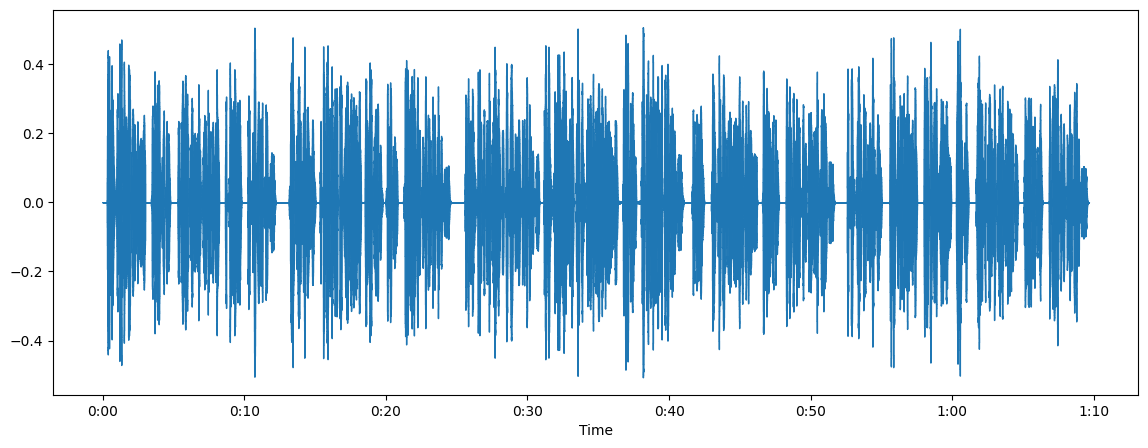

In [ ]:
flg = plt.figure(figsize=(14,5))
librosa.display.waveshow(data,sr=signal)

뉴스 음성 데이터의 waveform 시각화는 파형의 시간적 변화를 보여주는 것으로, 주로 시간에 따른 음압(소리의 압축 및 드셔이어 압축을 나타내는)의 그래프입니다.x축은 시간이고 y축은 음압(리의 진동이나 파동이 공기나 다른 매체에서 압축 및 드셔이어 압축을 발생시키는 정도)의 크기. 그래프가 더 높은 위치에 있을수록 음압의 크기가 크다. 아나운서의 음성 데이터의 waveform 그래프가 대칭 구조를 가질 수 있습니다. 아나운서의 음성은 주로 깔끔하고 균일한 주파수와 진폭을 가지기 때문에 대칭적인 형태를 나타낼 가능성이 높습니다. 이러한 대칭적인 형태는 아나운서가 발음을 명확하고 균형있게 하는 경향이 있기 때문일 수 있습니다.

In [ ]:
print("sampling_rate : ", signal , "audio_shape : ", data.shape)
print("length : ", data.shape[0]/float(signal),'secs')

sampling_rate :  16000 audio_shape :  (1114414,)
length :  69.650875 secs


FFT 분석 = 푸리에 변환


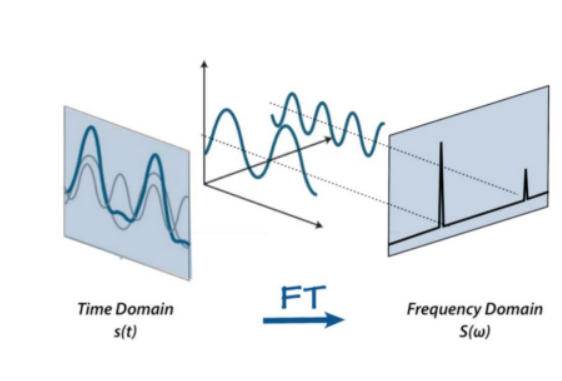

음성 데이터 분석을 위해 주파수 성분을 뽑을 때, 푸리에 변환을 사용합니다. 푸리에 변환은 입력 신호를 다양한 주파수를 가지는 주기 함수들로 분해하는 기법입니다. 주기 함수들을 분해함으로써 음성 데이터에서 노이즈 및 배경 소리로 부터 실제로 유용한 소리의 데이터, 즉 특징을 추출하기 위해 적용 됩니다. 먼저 푸리에 변환을 통해 음성 데이터의 파워 스펙트럼을 시각화 해보겠습니다.

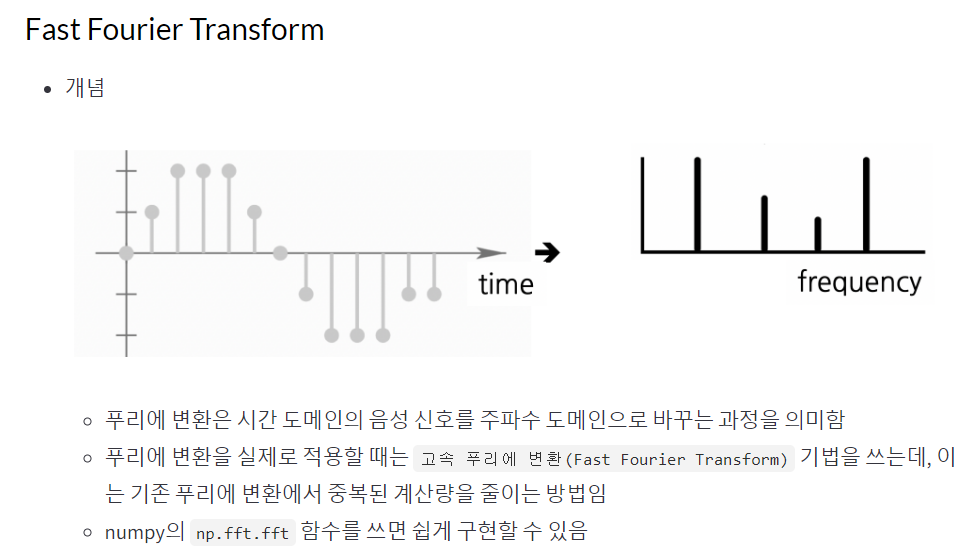

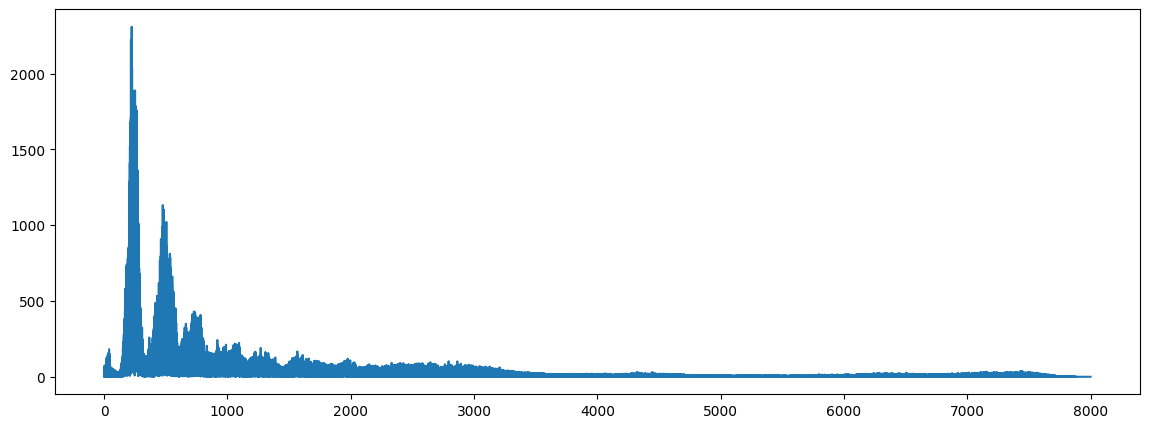

In [ ]:
fft = np.fft.fft(data)

magnitude = np.abs(fft)
frequency = np.linspace(0,signal,len(magnitude))
left_frequency=frequency[:int(len(frequency)/2)]
left_magnitude=magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize=(14,5))
plt.plot(left_frequency,left_magnitude)
#x축은 frequency
#y축은 Magnitude
plt.show()

퓨리 변환은 시간 도메인의 신호를 주파수 도메인으로 변환하는 기술입니다. 따라서 퓨리 변환을 한 후의 결과에서 x축은 주파수를 y축은 각 주파수 성분의 강도를 나타냅니다. 일반적으로 낮은 주파수는 좀 더 큰 값으로 표시되고, 높은 주파수는 상대적으로 작은 값으로 표시됩니다. 이것은 주로 변환된 신호에서 저주파수 구성 요소가 더 강하게 나타나기 때문입니다.

퓨리 변환을 통해 얻게 되는 주파수 스펙트럼은 0 Hz에서부터 나이퀴스트 주파수까지의 범위를 커버합니다.

스펙토그램

푸리에 변환을 통해 특정 길이의 음성 조각이 각각의 주파수 성분을 얼마만큼 갖고 있는지를 의미하는 스펙트럼을 얻을 수 있습니다, 즉 음성에 들어있는 정보들을 수학적인 신호 처리를 거쳐 추출할 수 있습니다. 이후 여러 개의 스펙트럼을 시간 축에 나열하면 시간 변화에 따른 스펙트럼의 변화인 스펙트로그램이 시각화 됩니다.

STFT를 적용해 구한 Spectrogram을 시각화함.
x축은 시간, y축은 주파수 -> 주파수 정도를 색깔로 확인할 수 있음

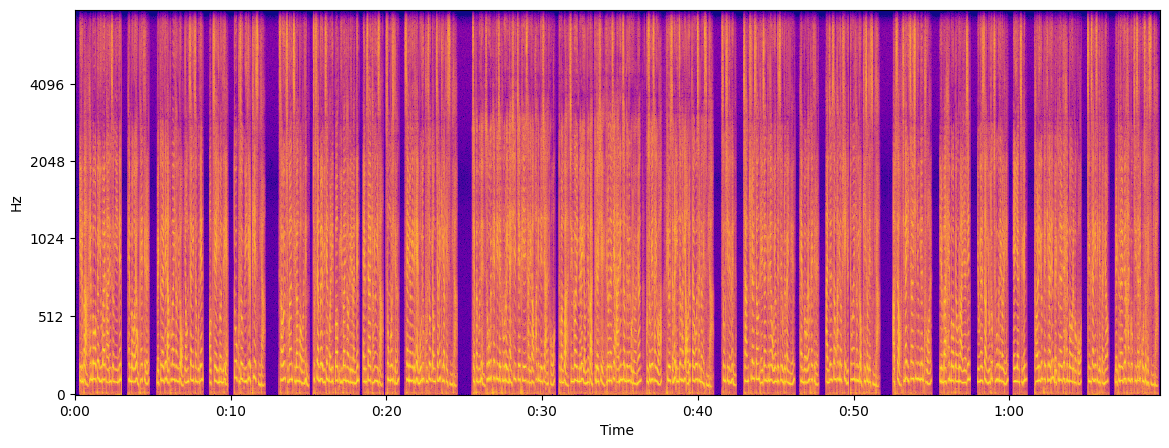

In [ ]:
hop_length = 512
n_fft = 2048

stft = librosa.stft(data,n_fft=n_fft,hop_length=hop_length)
spectrogram = np.abs(stft)
S_db = librosa.power_to_db(spectrogram,ref=np.max)

# magnitude > Decibels
# log_spectrogram = librosa.amplitude_to_db(magnitude)

fig = plt.figure(figsize=(14,5))
librosa.display.specshow(S_db, sr=signal,hop_length=hop_length,y_axis='mel', x_axis='time')
plt.plasma();
#배경을 푸른색으로 변경
plt.show()

# 값이 너무 미세해서 차이를 파악하기 힘들어, 관찰하기에 적합하지 않음.
# 그래서 Log-spectogram을 이용.

값이 너무 미세해서 차이를 파악하기 힘들어, 관찰하기에 적합하지 않음.
그래서 Log-spectogram을 이용.

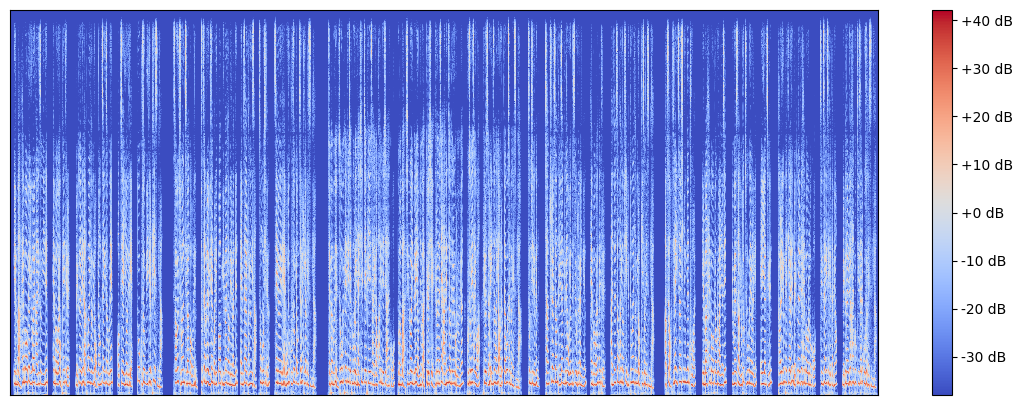

In [ ]:
log_spectogram=librosa.amplitude_to_db(spectrogram)

fig = plt.figure(figsize=(14,5))
librosa.display.specshow(log_spectogram,
                         sr=signal,
                         hop_length=hop_length)
#x 축은 시간 y축은 로그(Frequency)
plt.colorbar(format='%+2.0f dB')
plt.show()

MFCC = 포먼트 분석

오디오 신호 처리 분야에서 많이 사용되는 소리 데이터의 특징값으로,
사람의 청각이 예민하게 반응하는 정보를 강조하여 소리가 가지고 있는 특징을 추출한 값.

음성 데이터의 경우 같은 말이라도 데이터의 길이가 다를 수 있습니다. 예를 들어, 같은 "밥 먹었습니다."라는 음성을 담고 있어도 어떤 데이터는 2초, 어떤 데이터는 5초가 될 수 있습니다. 따라서 MFCC 알고리즘을 통해 음성 데이터를 특징 벡터화 해줍니다. MFCC는 입력된 소리 전체를 대상으로 하는 것이 아니라, 사람이 인지하기 좋은 Mel-scale로 음성 데이터를 모두 20 ~ 40ms로 나누어 구간에 대한 스펙트럼을 분석하여 푸리에 변환을 합니다. MFCC의 주요 인자는 다음과 같습니다.

음성 신호에서 주파수와 시간에 대한 특성을 추출하는 데 사용되는 특징 벡터입니다.

따라서 특징벡터를 단순히 주파수를 쓰기 보다는 달팽이관의 특성에 맞추어 스케일링 하는 것이 더욱 효과적인데, 이를 Mel-scale이라고 함

(20, 2177)


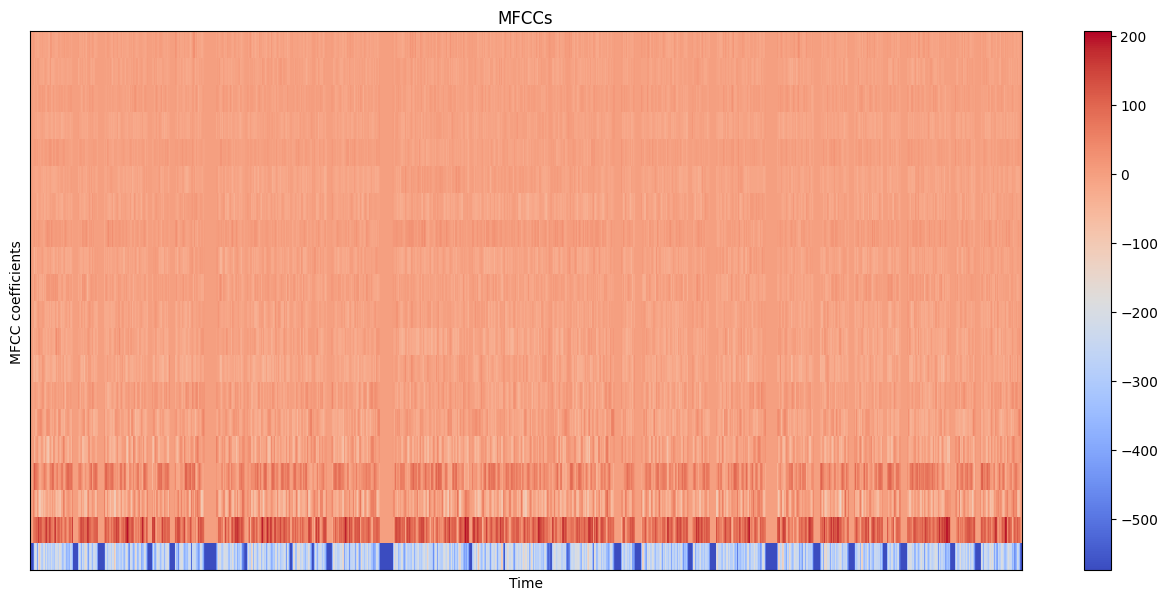

In [ ]:
import sklearn
from sklearn import preprocessing


extracted_features = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=20)
print(extracted_features.shape) # (n_mfcc, time_step)

extracted_featuires = sklearn.preprocessing.minmax_scale(extracted_features,axis=1)
# display MFCCs
plt.figure(figsize=(16,7))
librosa.display.specshow(extracted_features, sr=signal, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

# 남자 아나운서 주파수 분석

Detected language 'ko' with probability 0.99951171875

[00:00:00,180 --> 00:00:09,180]  서울 마포구 경의선 숲길 산책로에서 참새와 비둘기 수십 마리가 집단 폐사한 사건에 용의자가 붙잡혔습니다.

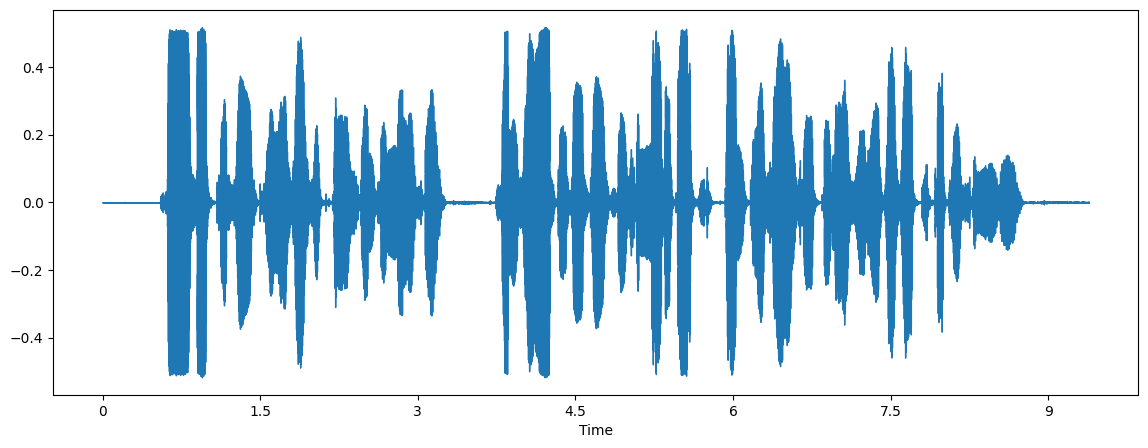

In [ ]:
data_m,sampling_rate = librosa.load("/content/drive/MyDrive/SPK087YTNSO898M001.wav",sr=16000)
flg = plt.figure(figsize=(14,5))
librosa.display.waveshow(data_m,sr=sampling_rate)
plt.show()

그래프의 두께는 소리의 볼륨이나 강도를 보여준다. 아나운서가 더 크고 강하게 말하는 부분이다. 그래프를 보고 어느부분을 아나운서가 강조했고 높은 소리로 말했는지 알 수있다.

In [ ]:
fft = np.fft.fft(data_m)

magnitude = np.abs(fft)
frequency = np.linspace(0,sampling_rate,len(magnitude))
left_frequency=frequency[:int(len(frequency)/2)]
left_magnitude=magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize=(14,5))
plt.plot(left_frequency,left_magnitude)
#x축은 frequency
#y축은 Magnitude
plt.show()

In [ ]:
import sklearn
from sklearn import preprocessing


extracted_features = librosa.feature.mfcc(y=data_m, sr=16000, n_mfcc=20)
print(extracted_features.shape) # (n_mfcc, time_step)

extracted_featuires = sklearn.preprocessing.minmax_scale(extracted_features,axis=1)
# display MFCCs
plt.figure(figsize=(16,7))
librosa.display.specshow(extracted_features, sr=sampling_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

# 여자 아나운서 주파수 분석

Detected language 'ko' with probability 0.99951171875

[00:00:00,000 --> 00:00:12,000]  이른바 햄버거병 유발 가능성이 있는 햄버거용 패티를 맥도날드에 납품한 혐의로 영장이 청구된 업체의 임원들이 또 구속위기를 피했습니다.

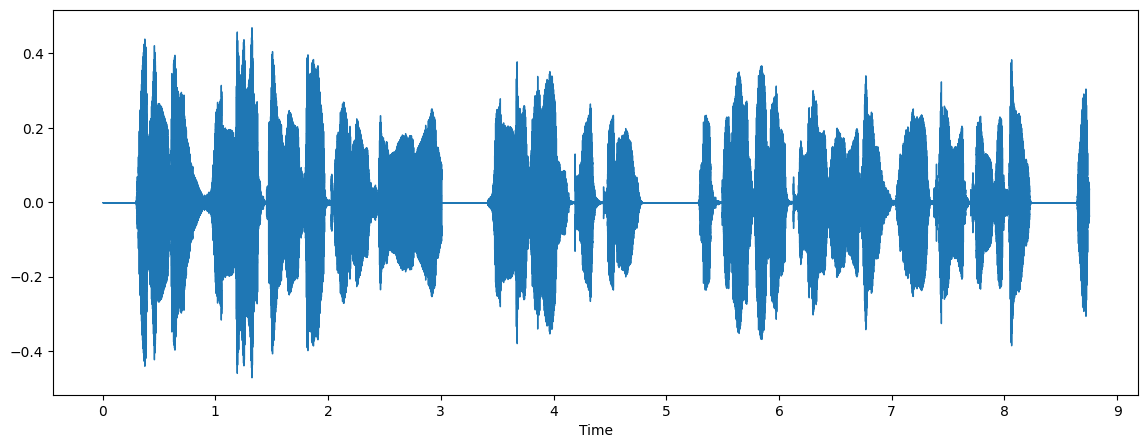

In [ ]:
data_f,sampling_rate = librosa.load("/content/drive/MyDrive/SPK003YTNSO162/SPK003YTNSO162F001.wav",sr=16000)
flg = plt.figure(figsize=(14,5))
librosa.display.waveshow(data_f[:140000],sr=sampling_rate)
plt.show()

# KoBerTopic

**기존 토픽 모델링 기법은 클러스터의 중심에 근접한 단어를 클러스터를 대표하는 토픽으로 가정했다면 BERTopic은 BERT를 통해 맥락적 단어-문장 벡터 표현을 생성한다. 즉 유사한 텍스트가 vector space에서 가깝도록 텍스트의 의미를 인코딩한다.**

LSA vs LDA vs BERTopic

LSA(잠재 의미 분석)  : BOW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있음. 이를 위한 대안으로 DTM의 잠재된 의미를 이끌어내는 방법으로 LSA가 나옴.이때 SVD(특이값 분해)를 이용함.SVD란 A라는 행렬이 존재 할 때 3개의 행렬의 곱으로 분해하는 것을 말한다.LSA는 FULL SVD를 사용하느 것이 아닌 절단된 SVD를 이용한다. 따라서 LSA는 기본적으로 DTM이나 TF-IDF 행렬에 절단된 SVD를 사용하여 차언을 축소시키고, 단어들의 잠재적인 의미를 끌어낸다는 아이디어를 갖고 있다.

LDA(잠재 디리클레 할당) : LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정한다. 따라서 LDA는 문서가 생성되던 과정을 역추적한다. LDA는 각 문서의 토픽 분포와 각 토픽 내의 단어 분포를 추정한다.

- LSA : DTM을 차원 축소하여 축소 차원에서 근접 단어들을 토픽으로 묶는다
- LDA : 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출한다.

BERTopic : BERT embeddings과 TF-IDF를 활용하여 주제 설명에서 중요한 단어를 유지하면서도 쉽게 해석할 수 있는 조밀한 클러스터를 만드는 토픽 모델링 기술이다.과정을 설명하겠다. 먼저 텍스트 전처리를 한 후 SBERT를 사용하여 문서를 임베딩한다. 나는 한국어 포함 100개 이상의 언어로 학습된 다국어 SBERT를 사용하였다. 그 다음 문서를 군집화 하는 과정을 수행한다. UMAP을 사용하여 임베딩의 차원을 줄이고(PCA,T-sense등 다른 임베딩 차원 축소 모델이 있지만 BERTopic은 UMAP가 기본값이고 가장 성능이 좋다) HDBSCAN 기술을 사용하여 차원 축소된 임베딩을 클러스터링하고(HDBSCAN 역시 기본값이며 k-means등 다른 방법도 가능하나 HDBSCAN이 가장 성능이 좋다) 의미적으로 유사한 문서 클러스터를 생성하였다. 그리고 나는 벡터화를 Countvectorize를 쓰지 않고 TF-IDFVectorizer를 썻다. 그 이유는 CountVecorizer 같은 경우 띄어쓰기를 기준으로 벡터화를 수행하기 때문에 한국어에는 맞지 않다고 생각했기 때문이다. 막지막으로 클래스 기반 TF-IDF로 토픽을 추출한다.

- UMAP 차원 축소 모델? : UMAP은 대상 공간에서 근접성을 최대한 보존하면서 저차원으로 투영하는 비선형 차원 축소 기법입니다. 이를 위해 데이터의 근접성을 유사도 그래프로 표현하고, 이를 유사한 구조를 가진 저차원 공간으로 보존합니다. 데이터의 근접성을 계산할 때 저는 cosine 유사도를 사용했음.

- HDBSCAN 클러스터링 모델? : 밀도 기반 클러스터링의 한 종류이다. 밀도 기반 크러스터링은 데이터의 밀도가 높은 지역을 클러스터로 정의하고, 비교적 낮은 밀도의 지역은 잡음으로 간주하는 방식으로 동작한다. DBSCAN이라는 클러스터링 알고리즘을 기반으로 하며 더욱 정교하게 수행한다.

In [ ]:
import pandas as pd

news = pd.read_csv("/content/drive/MyDrive/알파코_과제/뉴스텍스트데이터.csv",encoding='utf-8')
news

In [2]:
news_sub = news[['text','title','date']]
news_sub

,text,title,date
0,광주 동구는 가을 축제를 연기해달라는 중앙재난안전대책본부 권고에 따라 충장 축제 개...,[간추린 뉴스] `GGM 기술직 연봉 3천만 원 미만…적정임금 시급` 외,20211007
1,법원은 행정기관이 펜션 용지를 넘겨주지 않아 민간사업자가 대출금 가운데 (1)/(일...,로봇랜드 천억 대 소송 패소…정상화 `빨간불`,20211007
2,온라인으로 체결된 이번 협약을 통해 이르면 내년 (3)/(삼) 월부터 필리핀의 농민...,"[충북&오늘] 괴산군, 국민체육센터 건립…영동군, 인력지원 협약",20211007
3,(2024)/(이천 이십 사) 년 문을 열 체험단지에는 교육체험 센터와 로프 체험 ...,"[충북&오늘] 충주시, 응원지원금 지급…보은군, 한우유전자원센터 운영",20211008
4,조선대학교병원이 국가결핵관리 평가대회에서 최우수병원으로 선정됐습니다. 목포시가 부주...,"[단신브리핑] 영암군, 원룸 등에 여성안심거울 설치 외",20211027
...,...,...,...
1721,맨시티와 리버풀은 맨체스터에서 열린 (EPL)/(이 피 엘) 라운드 경기에서 두 골...,"`승점 1점 차` 1위 맨시티 vs 2위 리버풀, 난타전 끝 무승부",20220411
1722,"손흥민은 풋볼 런던에서 평점 (10)/(십) 점 만점, 후스코어드닷컴에서 (9.6)...","손흥민 `해트트릭` 리그 15,16,17호 골...토트넘 4연승",20220410
1723,허구연 총재는 이 자리에서 '야구장이 돔구장으로 지어지면 야구뿐 아니라 여러 가지 ...,오세훈-허구연 만남 `서울시-야구계 돔구장 필요성 논의한 자리`,20220424
1724,올해 아시안게임이 열리는 항저우는 도시 봉쇄가 계속되고 있는 상하이와 불과 (200...,"`OCA 관계자, 中 항저우 아시안게임 연기 가능성 제기`",20220423


In [3]:
import re

news_sub.title = news_sub.title.apply(lambda x : re.sub('[^A-Za-z0-9가-힣]',' ',x))
news_sub.title = news_sub.title.apply(lambda x : re.sub(' +',' ',x))

<ipython-input-3-76dfe5918a97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_sub.title = news_sub.title.apply(lambda x : re.sub('[^A-Za-z0-9가-힣]',' ',x))
<ipython-input-3-76dfe5918a97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_sub.title = news_sub.title.apply(lambda x : re.sub(' +',' ',x))


In [4]:
!pip install bertopic[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 19.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [5]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 27.1 MB/s eta 0:00:00


In [6]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from collections import Counter
from konlpy.tag import Okt
okt = Okt()

**빈도수로 불용어 파악하기**

In [ ]:
text = []
for i in range(len(news_sub.text)):
    a = okt.nouns(news_sub.text[i])
    for j in a:
        if len(j) > 1:
            text.append(j)
text

In [ ]:
vocab = Counter(text)
sorted_vocab = vocab.most_common()
sorted_vocab

**불용어**

In [9]:
korean_stopwords=' 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
stop_words = korean_stopwords
stop_words = stop_words.split(' ')

In [ ]:
stop_words.extend(['서울','공개','대표','취소','시비르','개월','관련','확인','센터','다음','경기','자막','도로','미만','오늘','설치','수수','뉴스','의혹','렘데','조사','대법','수사','화재',
                   '선생','분기','퍼센트','전보','고드름','미터','어머니','마리','뚜렷','이후','당시','경우','예정','자신','지난달','이천','우리','해당','이유','다시','다섯','때문','현재',
                   '어제','만큼','상대로','육십','일부','다음','가장','다른','동안','관계','보고','미터','아이','케이','기간','아파트','일곱','지사','측은','여덟','정도','처음','이백','서른',
                   '오늘','대해','관련','이십','오십','위해','지난해','에이','삼천','사백','에스','오천','육백','킬로미터','문수사','문단','에스','브이','적용','오백','제곱미터','명과','권노갑',
                   '부처','일간','미림','칠십','주년','지난','경축','행사','꼽았습니','버뮤데즈','축소','보이지','예년','통해','프레','앞서','브룩스','시사','수도','인용','입장','기미','보이지'])
stop_words

**1글자 이상 명사만 추출**

In [11]:
class CustomTokenizer:
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        word_tokens = self.tagger.nouns(sent)
        result = [word for word in word_tokens if len(word) > 1]
        return result

In [12]:
custom_tokenizer = CustomTokenizer(Okt())

**TfidfVectorizer로 BOW(Bag of Words) 생성**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer,min_df=2, ngram_range=(1,2),stop_words=stop_words)
vectorizer.fit(news_sub.text)
vectorizer.vocabulary_

**모델 생성**

In [14]:
from umap import UMAP
import hdbscan
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer()
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric="cosine", random_state=42)   # 차원축소
embedding_model = "sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens"             # SBert 사용
hdbscan_model=hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)     # 클러스터 모델

model = BERTopic(embedding_model=embedding_model,
                 vectorizer_model=vectorizer,
                 top_n_words=15,
                 min_topic_size=5,    # 예를 들어, min_topic_size=8로 설정하면 각 토픽의 크기가 최소 8개의 문서를 가져야 합니다.
                 nr_topics=10,        # 총 10개 토픽
                 umap_model=umap_model,
                 hdbscan_model=hdbscan_model,
                 verbose=True,
                 language='Korean',
                 n_gram_range=(1,2),
                 ctfidf_model = ctfidf_model,
                 calculate_probabilities=True)

In [15]:
topics, probs = model.fit_transform(news_sub.text)

2024-05-03 00:08:51,782 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:01<?, ?B/s]

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

2024-05-03 00:21:59,355 - BERTopic - Embedding - Completed ✓
2024-05-03 00:21:59,358 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-03 00:22:22,159 - BERTopic - Dimensionality - Completed ✓
2024-05-03 00:22:22,161 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-03 00:22:22,597 - BERTopic - Cluster - Completed ✓
2024-05-03 00:22:22,599 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-03 00:30:23,338 - BERTopic - Representation - Completed ✓
2024-05-03 00:30:23,340 - BERTopic - Topic reduction - Reducing number of topics
2024-05-03 00:37:50,573 - BERTopic - Topic reduction - Reduced number of topics from 66 to 10


In [16]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,660,-1_혐의_재판_검찰_의원,"[혐의, 재판, 검찰, 의원, 대통령, 경찰, 북한, 장관, 정부, 국민, 대한, ...","[이후 두 단체는 소송을 제기했고, 지난 (1)/(일) 일 (1)/(일) 심 재판부..."
1,0,615,0_대통령_북한_장관_유치원,"[대통령, 북한, 장관, 유치원, 혐의, 의원, 검찰, 청와대, 정부, 대한, 재판...",[이 장관은 선택과 결단의 시간이 임박했다고 말했습니다. 그러면서 '우리에게 그런 ...
2,1,118,1_환자_코로나_의료_치료,"[환자, 코로나, 의료, 치료, 백신, 투약, 병원, 중증, 위험, 방역, 서비스,...",[국내 환자에게 투약이 시작된 지 오늘로 닷새째인데 방대본은 효과 분석 등에 대한 ...
3,2,113,2_경찰_차량_혐의_사고,"[경찰, 차량, 혐의, 사고, 남성, 경찰서, 범행, 운전자, 피해자, 폭행, 운전...",[추가로 드러난 폭행 피해자 가운데 여성이 (4)/(네) 명이고 (2)/(두) 명은...
4,3,83,3_소득_가계_감소_가처분,"[소득, 가계, 감소, 가처분, 삼십, 증가, 기업, 수요, 전체, 전기차, 소비,...","[지원 대상으로 확정된 채무자는 모두 (46)/(사십 육) 만여 명으로, 전체 채무..."
5,4,39,4_발사_미사일_시험 발사_시험,"[발사, 미사일, 시험 발사, 시험, 북한, 잠수함 발사, 풍력, 우주, 잠수함, ...",[이어 '실험이 이뤄진다면 이번 주 후반이나 다음 주가 될 것으로 보인다' 고 내다...
6,5,38,5_시즌_홈런_안타_선두,"[시즌, 홈런, 안타, 선두, 득점, 승리, 리버풀, 타점, 연승, 리그, 후반, ...",[순식간에 아웃 카운트 (2)/(두) 개를 잡은 박진형은 이어진 (2)/(투) 아웃...
7,6,29,6_처분_재건축_서울대_미등록,"[처분, 재건축, 서울대, 미등록, 강남구, 포르쉐, 기소, 신청, 부지, 중지, ...",[계열별로는 자연계열이 (162)/(백 육십 이) 명으로 인문계열 (13)/(십 삼...
8,7,26,7_기온_추위_영하_바람,"[기온, 추위, 영하, 바람, 예상, 기온 영하, 한파, 아침, 낚시, 포인트, 주...","[서울 (3)/(삼) 도, 광주 (7)/(칠) 도, 부산 (9)/(구) 도까지 올라..."
9,8,5,8_구조_강화도_잠수함_해군,"[구조, 강화도, 잠수함, 해군, 함정, 오클랜드, 기름, 건조, 차기, 해상, 고...",[(8)/(여덟) 명이 탑승한 것으로 추정되는데 (6)/(여섯) 명은 어젯밤 사고 ...


In [17]:
model.visualize_topics()

In [18]:
model.visualize_barchart(top_n_topics=10)

In [ ]:
news_sub['date'] = pd.to_datetime(news_sub['date'],format='%Y%m%d')

In [ ]:
timestamps = news_sub.date.tolist()
topics_over_time = model.topics_over_time(docs = news_sub.text,
                                          timestamps = timestamps,
                                          global_tuning = True,
                                          evolution_tuning = True)

2024-05-02 07:58:42,526 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 162) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 
162it [03:50,  1.42s/it]


In [ ]:
model.visualize_topics_over_time(topics_over_time)

**모델 평가**

In [19]:
df = ["""4월까지 KIA가 1위를 유지한 데는 네일의 호투가 큰 역할을 했다. 2024시즌 KBO 리그에 처음으로 발을 들인 네일은 6경기에 등판해 4승을 거두고 평균자책점 1.47을 기록하며 두 부문에서 1위를 차지했다. 특히 평균자책점은 규정이닝을 채운 투수 중 유일하게 1점대를 기록했다. 또한 WHIP(이닝 당 출루 허용률)도 0.98로 유일하게 1점 대 이하를 달성하며 타자들에게 공포의 투수로 떠오르고 있다."""]

In [20]:
topics, probs = model.transform(df)
print('예측한 토픽 번호 :', topics)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-03 00:57:20,186 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-03 00:57:27,747 - BERTopic - Dimensionality - Completed ✓
2024-05-03 00:57:27,750 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-03 00:57:27,753 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-05-03 00:57:27,769 - BERTopic - Probabilities - Completed ✓
2024-05-03 00:57:27,770 - BERTopic - Cluster - Completed ✓


예측한 토픽 번호 : [5]


In [ ]:
df_1 = ["""전국에 푸른 하늘이 함께하고 있습니다.

지금 제 옆으로는 조금 전 잠실대교의 모습이 보이고 있는데요.

하늘에 마치 파란 물감을 풀어놓은 것 같고요.

미세먼지도 안개도 없어서 시야도 깨끗합니다.

낮 동안 햇살이 비추면서 따뜻했습니다.

오늘 서울의 최고 기온이 23.7도까지 올랐는데요.

강한 일사가 계속되면서 내일은 28도, 모레는 29도까지 올라 더워지겠습니다.

현재 수도권과 강원도 원주에는 건조주의보가 내려져 있습니다.

중부 지방은 갈수록 대기가 메말라 갈 것으로 보여서요.

불 조심하셔야겠습니다.

오늘 늦은 오후에 전남 서부로는 소나기가 살짝 지나는 곳이 있겠습니다.

내일도 전국 하늘 대체로 맑겠고요.

공기도 깨끗하겠습니다.

내일 아침 기온을 보시면 서울이 13도, 대전 10도에서 시작하고요.

낮 기온은 서울이 28도, 광주와 대구 27도로 오늘보다 3, 4도가량 높겠습니다.

어린이날 오후부터 전국에 비가 올 텐데요.

밤사이 강한 비바람이 예상되고 있습니다.

날씨였습니다."""]

In [ ]:
topics, probs = model.transform(df_1)
print('예측한 토픽 번호 :', topics)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-02 08:02:58,698 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-02 08:02:59,881 - BERTopic - Dimensionality - Completed ✓
2024-05-02 08:02:59,883 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-02 08:02:59,886 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-05-02 08:02:59,898 - BERTopic - Probabilities - Completed ✓
2024-05-02 08:02:59,899 - BERTopic - Cluster - Completed ✓


예측한 토픽 번호 : [-1]


**모델 저장**

In [ ]:
import keras
from keras.models import load_model
path = '/content/drive/MyDrive/'
model.save(path + 'model.h5')


model.save_weights(path + 'model.weights.h5')

2024-05-02 08:56:44,499 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


PicklingError: Can't pickle <java class 'kr.lucypark.okt.OktInterface'>: it's not found as kr.lucypark.okt.kr.lucypark.okt.OktInterface

In [ ]:


from joblib import dump, load
path = '/content/drive/MyDrive/알파코_과제/'
dump(model, path + 'model.joblib')

PicklingError: Can't pickle <java class 'kr.lucypark.okt.OktInterface'>: it's not found as kr.lucypark.okt.kr.lucypark.okt.OktInterface

**spacy customtokenizer**

In [ ]:
!python -m spacy download ko_core_news_lg
import spacy
nlp = spacy.load("ko_core_news_lg")
nlp.max_length = 3000000

In [ ]:
#명사와 동사만 뽑아낼 수 있도록 처리 여기서는 명사만 뽑히게함.
def tokenizer(text):
        doc=nlp(text)

        lemmas = []
        texts_list = [token.lemma_.split('+') for token in doc]
        tags_list = [token.tag_.split('+') for token in doc]


        for token_idx in range(len(doc)):
            if tags_list[token_idx][0] in ('ncn','ncpa','ncps','nc','nq','f'): #'pvg','paa',
                if len(texts_list[token_idx])==len(tags_list[token_idx]):
                    if tags_list[token_idx][0].startswith('n') or tags_list[token_idx][0].startswith('f'):
                        lemmas.append(''.join([text for tag,text in zip(tags_list[token_idx],texts_list[token_idx]) if tag in ('ncn','ncpa','ncps','nc','nq','f')]).replace(' ','_'))
                    else:
                        lemmas.append(texts_list[token_idx][0]+'다')
                elif tags_list[token_idx][0] in ('ncn','ncpa','ncps','nc','f'):
                    lemmas.append(texts_list[token_idx][0])
                else:
                    lemmas.append(''.join((texts_list[token_idx])).replace(' ','_'))


        return lemmas